In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

In [2]:
# Load the datasets
data_1 = pd.read_csv("/Volumes/TwoTeras/0_Experiment_1/Entropy_Results/entropy_log.csv")
data_2 = pd.read_csv("/Volumes/TwoTeras/1_Experiment_2/Entropy_Results/entropy_log.csv")

# Split 'Filename' into 'SubjectID' and 'SessionNr'
data_1[['ParticipantID', 'SessionNr']] = data_1['Filename'].str.split('_', expand=True)
data_2[['ParticipantID', 'SessionNr']] = data_2['Filename'].str.split('_', expand=True)

# Drop the original 'Filename' column
data_1.drop(columns=['Filename'], inplace=True)
data_2.drop(columns=['Filename'], inplace=True)

# Convert SessionNr to integer if possible
data_1['SessionNr'] = pd.to_numeric(data_1['SessionNr'], errors='coerce')
data_2['SessionNr'] = pd.to_numeric(data_2['SessionNr'], errors='coerce')

# Stack the two datasets on top of each other (concatenate rows)
stacked_df = pd.concat([data_1, data_2], ignore_index=True)
stacked_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Overall_Transition_Entropy                   290 non-null    float64
 1   Transition_Entropy_Building                  290 non-null    float64
 2   Stationary_Entropy_Building                  290 non-null    float64
 3   Transition_Entropy_Background                290 non-null    float64
 4   Stationary_Entropy_Background                290 non-null    float64
 5   Transition_Entropy_TaskBuilding_Residential  290 non-null    float64
 6   Stationary_Entropy_TaskBuilding_Residential  290 non-null    float64
 7   Transition_Entropy_Passive_Agent             290 non-null    float64
 8   Stationary_Entropy_Passive_Agent             290 non-null    float64
 9   Transition_Entropy_TaskBuilding_Public       290 non-null    float64
 10  St

In [3]:
Coverage =  pd.read_csv('/Volumes/TwoTeras/Graph_Stuff/CSVs/Unique_NodeVisit_Ratios.csv')
# Force 'ParticipantID' to have 4 digits as a string
Coverage['ParticipantID'] = Coverage['ParticipantID'].apply(lambda x: f"{int(x):04d}")
display(Coverage.info())

Navigation = pd.read_csv("/Volumes/TwoTeras/Resources/Conservative_Explorative.csv", sep =",")
Navigation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ParticipantID         345 non-null    object 
 1   SessionNr             345 non-null    int64  
 2   IndividualNodeCount   345 non-null    int64  
 3   Experiment            345 non-null    object 
 4   CummulativeNodeCount  345 non-null    int64  
 5   IndividualRatio       345 non-null    float64
 6   CummulativeRatio      345 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 19.0+ KB


None

ParticipantId  Session  StrategyCount  StrategyPerc      Strategy  \
0           1754        1            7.0          0.22  Conservative   
1           1754        1           25.0          0.78   Explorative   
2           1754        1            6.0          0.24  Conservative   
3           1754        1           19.0          0.76   Explorative   
4           1754        1            2.0          0.12  Conservative   

           Decision  Total Experiment  
0     AgentAtChosen   32.0       Exp1  
1     AgentAtChosen   32.0       Exp1  
2  AgentAtNotChosen   25.0       Exp1  
3  AgentAtNotChosen   25.0       Exp1  
4       AgentAtBoth   17.0       Exp1

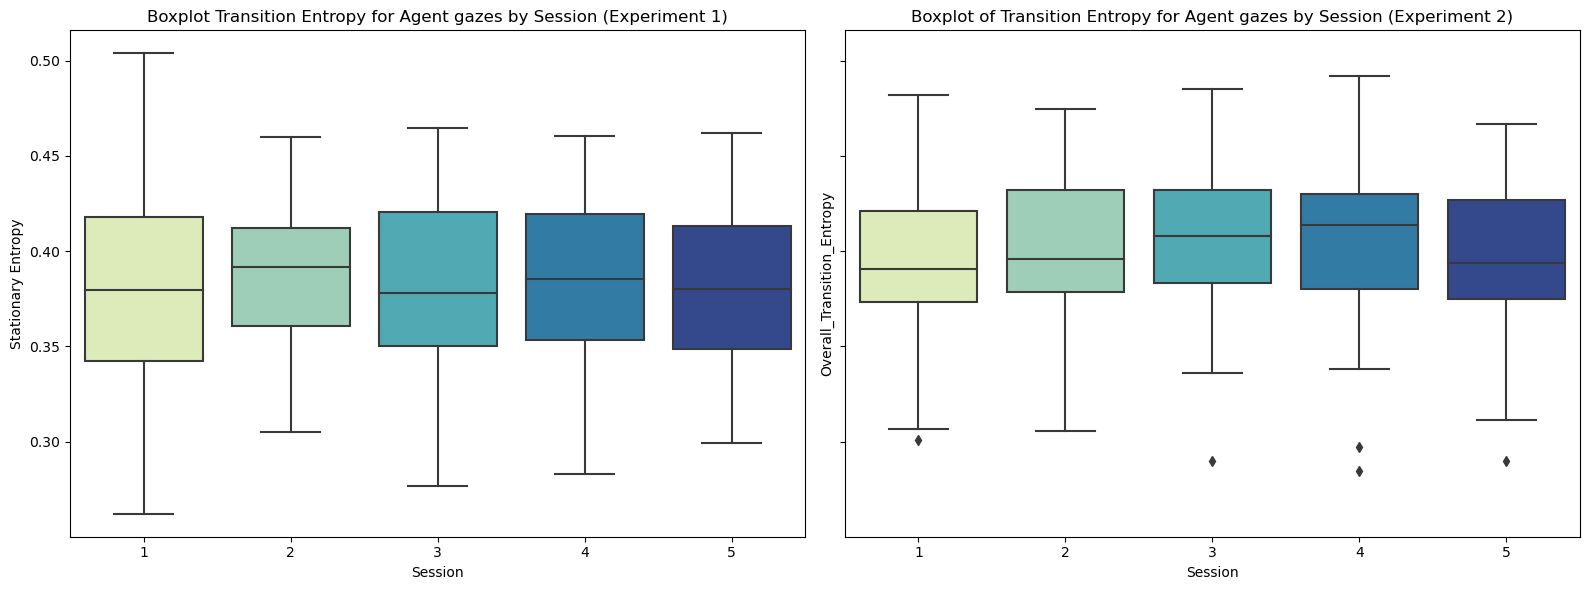

In [4]:
# Generate color lists from YlGnBu palette based on the number of unique sessions
num_sessions_1 = data_1['SessionNr'].nunique()
num_sessions_2 = data_2['SessionNr'].nunique()
palette = sns.color_palette("YlGnBu", max(num_sessions_1, num_sessions_2))

# Create subplots for side-by-side boxplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Boxplot for Experiment 1
sns.boxplot(data=data_1, x='SessionNr', y='Overall_Transition_Entropy', ax=axes[0], palette=palette[:num_sessions_1])
axes[0].set_title("Boxplot Transition Entropy for Agent gazes by Session (Experiment 1)")
axes[0].set_xlabel("Session")
axes[0].set_ylabel("Stationary Entropy")

# Boxplot for Experiment 2
sns.boxplot(data=data_2, x='SessionNr', y='Overall_Transition_Entropy', ax=axes[1], palette=palette[:num_sessions_2])
axes[1].set_title("Boxplot of Transition Entropy for Agent gazes by Session (Experiment 2)")
axes[1].set_xlabel("Session")

plt.tight_layout()
plt.show()


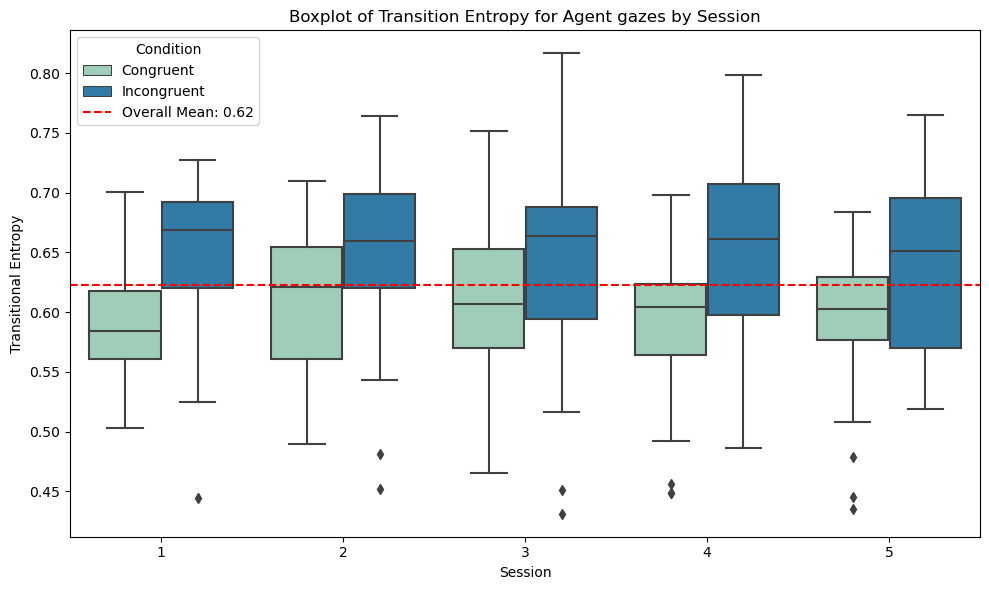

In [5]:
# Assuming data_1 and data_2 are already defined DataFrames for Experiment 1 and 2
# Add a column to each DataFrame to identify the experiment
data_1['Condition'] = 'Congruent'
data_2['Condition'] = 'Incongruent'

# Concatenate the two DataFrames
combined_data = pd.concat([data_1, data_2])

# Number of unique sessions in both experiments
num_sessions_1 = data_1['SessionNr'].nunique()
num_sessions_2 = data_2['SessionNr'].nunique()

# Generate a palette with two colors, one for each experiment
experiment_palette = sns.color_palette("YlGnBu", 2)

# Calculate the overall mean of Transition_Entropy_Active_Agent
overall_mean = combined_data['Transition_Entropy_Active_Agent'].mean()

# Plotting combined boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='SessionNr', y='Transition_Entropy_Active_Agent', hue='Condition', palette=experiment_palette)

# Add a red horizontal line for the overall mean
plt.axhline(overall_mean, color='red', linestyle='--', linewidth=1.5, label=f'Overall Mean: {overall_mean:.2f}')

# Set labels and title
plt.title("Boxplot of Transition Entropy for Agent gazes by Session")
plt.xlabel("Session")
plt.ylabel("Transitional Entropy")
plt.legend(title="Condition")
plt.tight_layout()
plt.show()

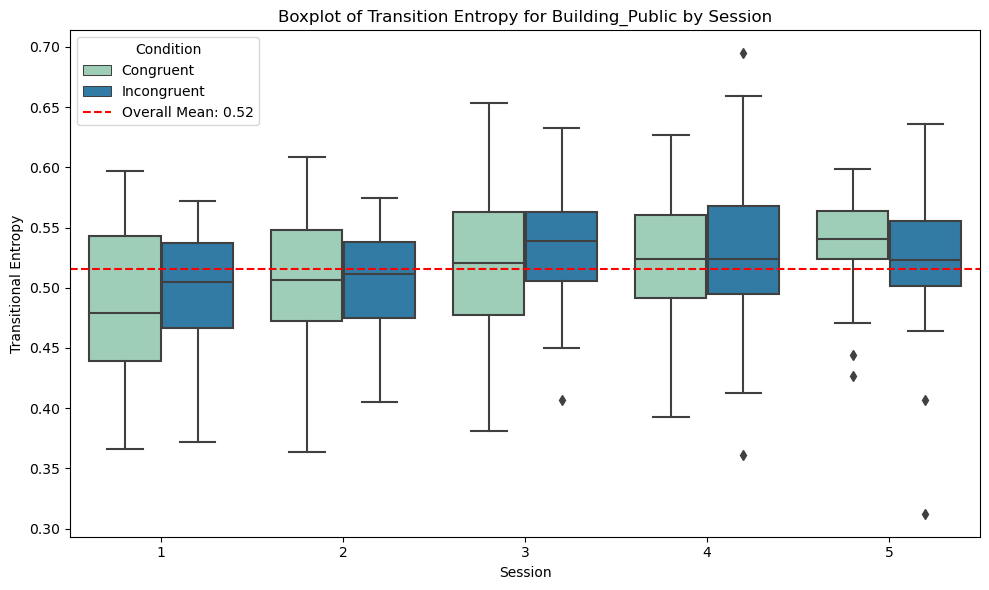

In [6]:
# Assuming data_1 and data_2 are already defined DataFrames for Experiment 1 and 2
# Add a column to each DataFrame to identify the experiment
data_1['Condition'] = 'Congruent'
data_2['Condition'] = 'Incongruent'

# Concatenate the two DataFrames
combined_data = pd.concat([data_1, data_2])

# Number of unique sessions in both experiments
num_sessions_1 = data_1['SessionNr'].nunique()
num_sessions_2 = data_2['SessionNr'].nunique()

# Generate a palette with two colors, one for each experiment
experiment_palette = sns.color_palette("YlGnBu", 2)

# Calculate the overall mean of Transition_Entropy_Active_Agent
overall_mean = combined_data['Transition_Entropy_TaskBuilding_Public'].mean()

# Plotting combined boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='SessionNr', y='Transition_Entropy_TaskBuilding_Public', hue='Condition', palette=experiment_palette)

# Add a red horizontal line for the overall mean
plt.axhline(overall_mean, color='red', linestyle='--', linewidth=1.5, label=f'Overall Mean: {overall_mean:.2f}')

# Set labels and title
plt.title("Boxplot of Transition Entropy for Building_Public by Session")
plt.xlabel("Session")
plt.ylabel("Transitional Entropy")
plt.legend(title="Condition")
plt.tight_layout()
plt.show()

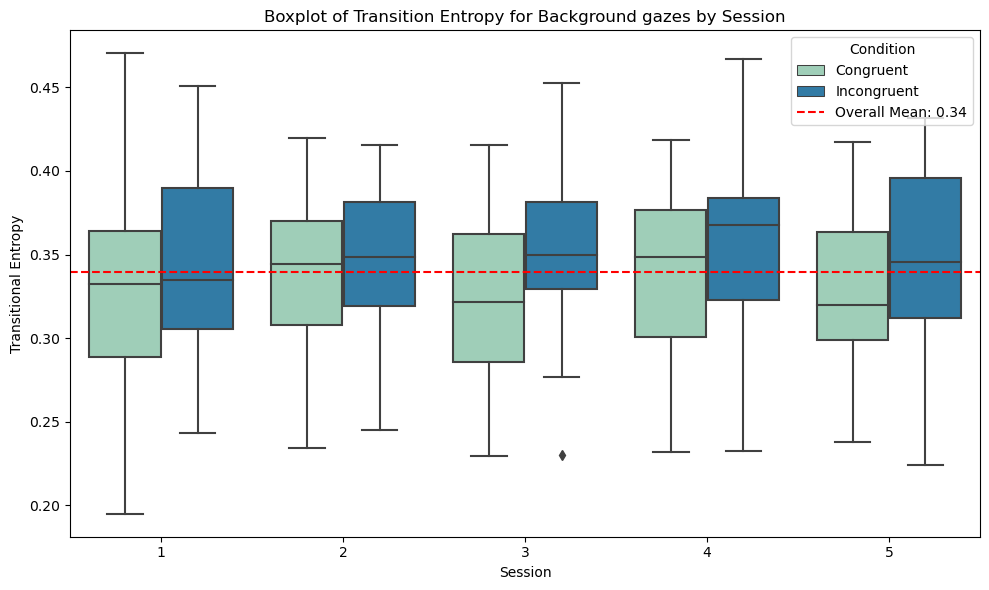

In [7]:
# Assuming data_1 and data_2 are already defined DataFrames for Experiment 1 and 2
# Add a column to each DataFrame to identify the experiment
data_1['Condition'] = 'Congruent'
data_2['Condition'] = 'Incongruent'

# Concatenate the two DataFrames
combined_data = pd.concat([data_1, data_2])

# Number of unique sessions in both experiments
num_sessions_1 = data_1['SessionNr'].nunique()
num_sessions_2 = data_2['SessionNr'].nunique()

# Generate a palette with two colors, one for each experiment
experiment_palette = sns.color_palette("YlGnBu", 2)

# Calculate the overall mean of Transition_Entropy_Active_Agent
overall_mean = combined_data['Transition_Entropy_Background'].mean()

# Plotting combined boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='SessionNr', y='Transition_Entropy_Background', hue='Condition', palette=experiment_palette)

# Add a red horizontal line for the overall mean
plt.axhline(overall_mean, color='red', linestyle='--', linewidth=1.5, label=f'Overall Mean: {overall_mean:.2f}')

# Set labels and title
plt.title("Boxplot of Transition Entropy for Background gazes by Session")
plt.xlabel("Session")
plt.ylabel("Transitional Entropy")
plt.legend(title="Condition")
plt.tight_layout()
plt.show()

In [8]:
Navigation = pd.read_csv("/Volumes/TwoTeras/Resources/Conservative_Explorative.csv", sep =",")
Navigation_Explor = Navigation[Navigation.Strategy == "Explorative"]
Navigation_Explor_Agent = Navigation[(Navigation.Strategy == "Explorative") & (Navigation.Decision == "AgentAtChosen")]
Exploration = pd.DataFrame(Navigation_Explor.groupby(["ParticipantId", "Session"])["StrategyPerc"].mean())
Exploration.reset_index(inplace=True)
Exploration_Agent = pd.DataFrame(Navigation_Explor_Agent.groupby(["ParticipantId", "Session"])["StrategyPerc"].mean())
Exploration_Agent.reset_index(inplace=True)
Exploration_Complete = pd.merge(Exploration, Exploration_Agent, on=['ParticipantId', 'Session'])
Exploration_Complete.rename({"ParticipantId": 'ParticipantID', "Session": "SessionNr", "StrategyPerc_x": "Exploration_General", "StrategyPerc_y": "Exploration_Agent", }, axis=1, inplace=True)
Exploration_Complete['ParticipantID'] = Exploration_Complete['ParticipantID'].apply(lambda x: f"{int(x):04d}")
Exploration_Complete.head()

ParticipantID  SessionNr  Exploration_General  Exploration_Agent
0          0365          1                0.600               0.58
1          0365          2                0.575               0.48
2          0365          3                0.410               0.27
3          0365          4                0.440               0.34
4          0365          5                0.460               0.37

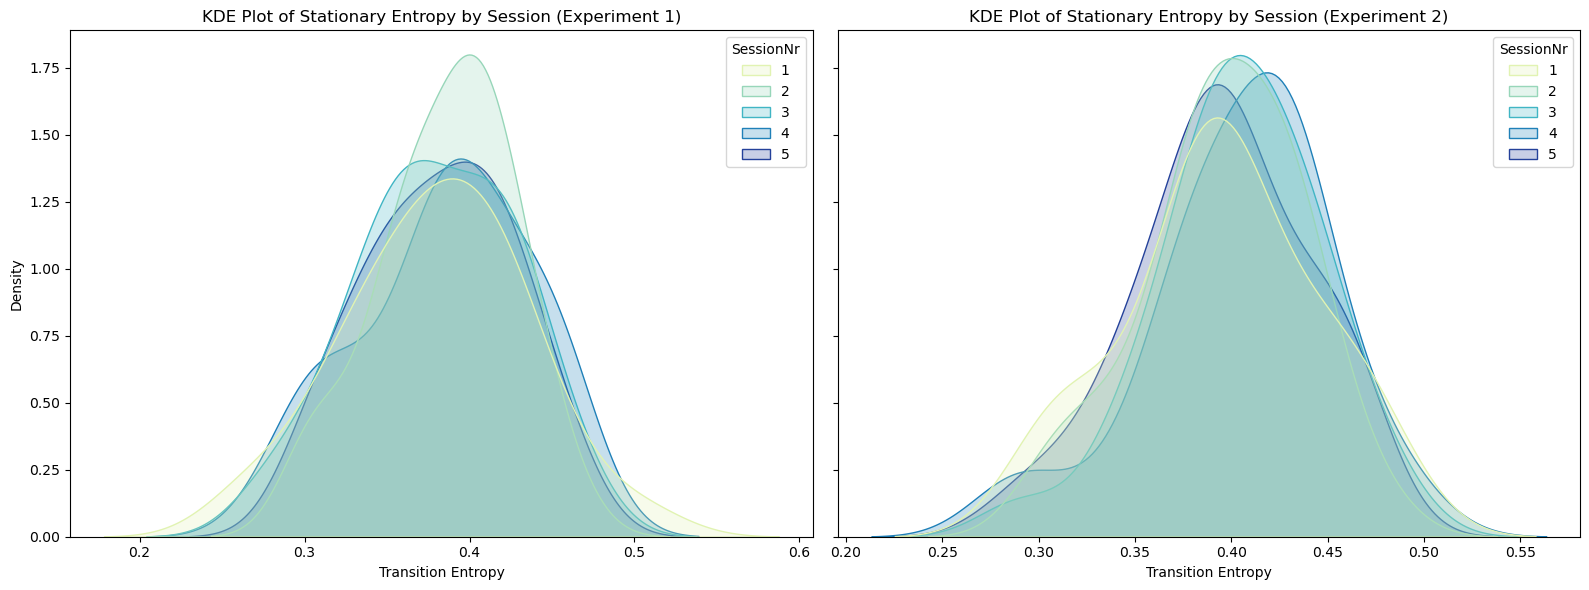

In [9]:
# Generate color lists from YlGnBu palette based on the number of unique sessions
num_sessions_1 = data_1['SessionNr'].nunique()
num_sessions_2 = data_2['SessionNr'].nunique()
palette = sns.color_palette("YlGnBu", max(num_sessions_1, num_sessions_2))

# Create subplots for side-by-side KDE plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# KDE for Experiment 1
sns.kdeplot(data=data_1, x='Overall_Transition_Entropy', hue='SessionNr', fill=True, ax=axes[0],
            palette=palette[:num_sessions_1])
axes[0].set_title("KDE Plot of Stationary Entropy by Session (Experiment 1)")
axes[0].set_xlabel("Transition Entropy")
axes[0].set_ylabel("Density")

# KDE for Experiment 2
sns.kdeplot(data=data_2, x='Overall_Transition_Entropy', hue='SessionNr', fill=True, ax=axes[1],
            palette=palette[:num_sessions_2])
axes[1].set_title("KDE Plot of Stationary Entropy by Session (Experiment 2)")
axes[1].set_xlabel("Transition Entropy")

plt.tight_layout()
plt.show()


In [10]:
# Merging the dataframes on 'SubjectID' and 'SessionNr'
merged_df = pd.merge(stacked_df, Coverage, on=['ParticipantID', 'SessionNr'])
Exploration_Entropy = pd.merge(merged_df, Exploration_Complete, on=['ParticipantID', 'SessionNr']) 
Exploration_Entropy.head()

Overall_Transition_Entropy  Transition_Entropy_Building  \
0                    0.372792                     0.373848   
1                    0.388197                     0.399520   
2                    0.422809                     0.409986   
3                    0.406077                     0.435806   
4                    0.370943                     0.432476   

   Stationary_Entropy_Building  Transition_Entropy_Background  \
0                     0.163934                       0.363942   
1                     0.163613                       0.393755   
2                     0.167412                       0.404376   
3                     0.163079                       0.363507   
4                     0.156274                       0.314108   

   Stationary_Entropy_Background  Transition_Entropy_TaskBuilding_Residential  \
0                       0.162436                                     0.406738   
1                       0.163403                                     0.382776   
2                       0.163298                                     0.480546   
3                       0.147103                                     0.521534   
4                       0.130542                                     0.521783   

   Stationary_Entropy_TaskBuilding_Residential  \
0                                     0.097264   
1                                     0.110629   
2                                     0.109643   
3                                     0.077872   
4                                     0.070081   

   Transition_Entropy_Passive_Agent  Stationary_Entropy_Passive_Agent  \
0                          0.372848                          0.009262   
1                          0.412787                          0.010249   
2                          0.533218                          0.010795   
3                          0.561920                          0.009614   
4                          0.570015                          0.011895   

   Transition_Entropy_TaskBuilding_Public  ...  \
0                                0.369477  ...   
1                                0.363531  ...   
2                                0.529522  ...   
3                                0.491361  ...   
4                                0.562856  ...   

   Stationary_Entropy_Active_Agent_Face  ParticipantID  SessionNr  \
0                              0.003991           1754          1   
1                              0.001761           1754          2   
2                              0.001222           1754          3   
3                              0.001712           1754          4   
4                              0.001197           1754          5   

   IndividualNodeCount  Experiment  CummulativeNodeCount  IndividualRatio  \
0                   85        Exp1                    85         0.537975   
1                   95        Exp1                   119         0.601266   
2                   90        Exp1                   130         0.569620   
3                  108        Exp1                   138         0.683544   
4                  109        Exp1                   138         0.689873   

   CummulativeRatio  Exploration_General Exploration_Agent  
0          0.537975               0.7800              0.78  
1          0.753165               0.6025              0.55  
2          0.822785               0.5500              0.41  
3          0.873418               0.5425              0.47  
4          0.873418               0.4375              0.32  

[5 rows x 28 columns]

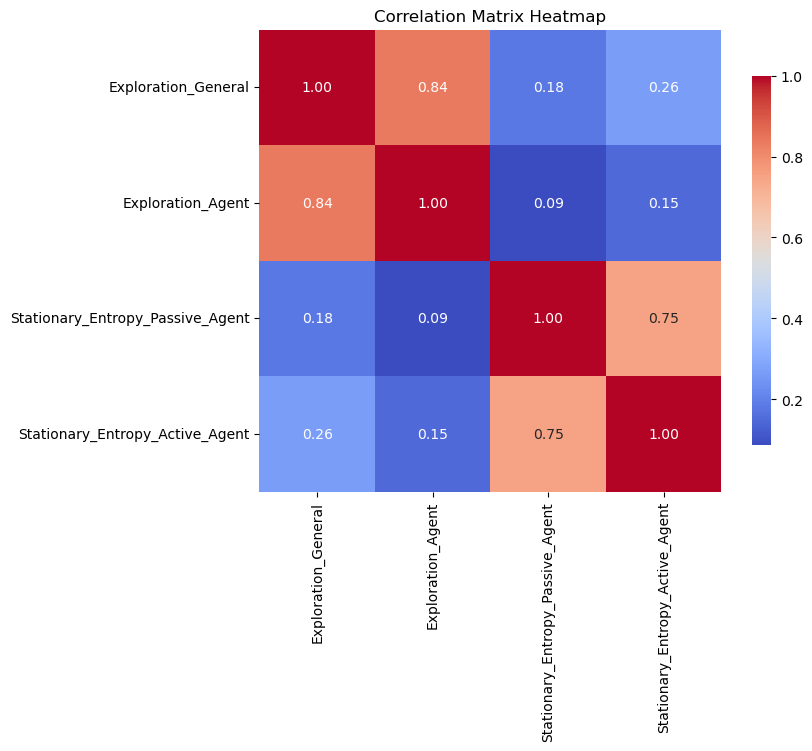

In [11]:
Corr = Exploration_Entropy[["Exploration_General", "Exploration_Agent", "Stationary_Entropy_Passive_Agent",  "Stationary_Entropy_Active_Agent"]].corr()
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(Corr, annot=True, cmap="coolwarm", square=True, cbar_kws={'shrink': .8}, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

<Axes: xlabel='Stationary_Entropy_Active_Agent', ylabel='Exploration_Agent'>

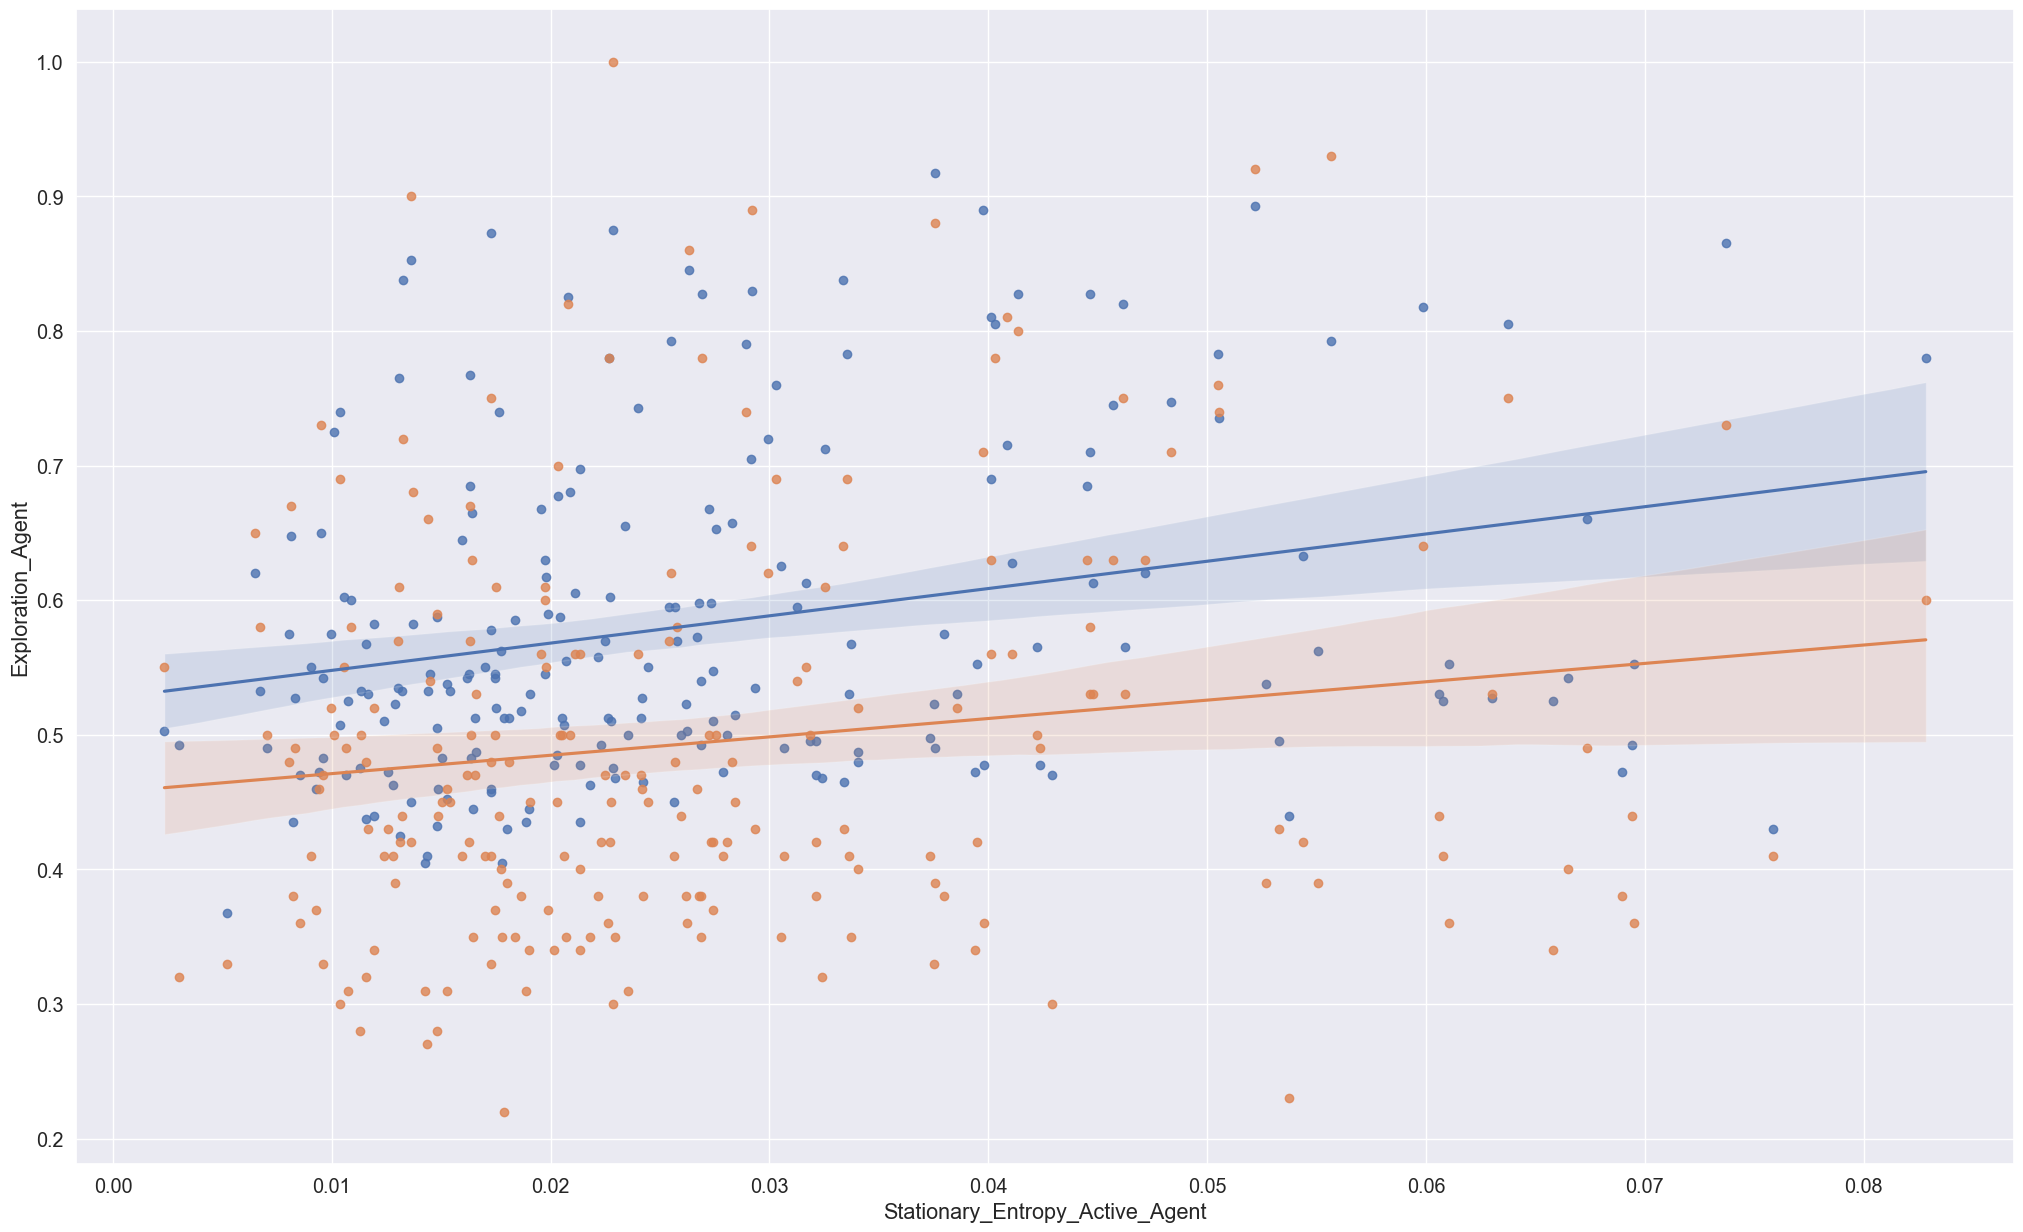

In [12]:
plt.figure(figsize=(25,15))
sns.set(font_scale = 1.3)
sns.regplot(x='Stationary_Entropy_Active_Agent', y='Exploration_General',
                data=Exploration_Entropy)
sns.regplot(x='Stationary_Entropy_Active_Agent', y='Exploration_Agent',
                data=Exploration_Entropy)